Data Engineering Challenge


Task1 - Data Structuring

In [ ]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:    # Unzipping the data.zip file
    zip_ref.extractall()

In [ ]:
import os
import pandas as pd

data = []

for filename in os.listdir('BBC_articles'):

    article_id, category = filename.split('_')  #  Splitting the filename to get the article_id and category

    with open(os.path.join('BBC_articles', filename), 'r', encoding='utf-8') as file:   # reading contents of file
        text = file.read()


    data.append({'article_id': article_id, 'text': text, 'category': category})   # Appending the data to the list

df = pd.DataFrame(data)

# Saving the DF as a CSV file
df.to_csv('bbc_articles.csv', index=False)

In [ ]:
df = pd.read_csv('bbc_articles.csv')
df

,article_id,text,category
0,1491,farrell due to make us tv debut actor colin fa...,entertainment.txt
1,1103,mixed signals from french economy the french e...,business.txt
2,2067,blog reading explodes in america americans are...,tech.txt
3,1769,curbishley delight for johansson charlton mana...,sport.txt
4,358,market unfazed by aurora setback as the aurora...,business.txt
...,...,...,...
1485,289,brown targets oaps and homebuyers gordon brown...,politics.txt
1486,1203,what now for british tennis tim henman s deci...,sport.txt
1487,1553,attack prompts bush site block the official re...,tech.txt
1488,1806,kelly trails new discipline power teachers cou...,politics.txt


In [ ]:
df.head()

,article_id,text,category
0,1491,farrell due to make us tv debut actor colin fa...,entertainment.txt
1,1103,mixed signals from french economy the french e...,business.txt
2,2067,blog reading explodes in america americans are...,tech.txt
3,1769,curbishley delight for johansson charlton mana...,sport.txt
4,358,market unfazed by aurora setback as the aurora...,business.txt


In [ ]:
df.describe()

,article_id
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


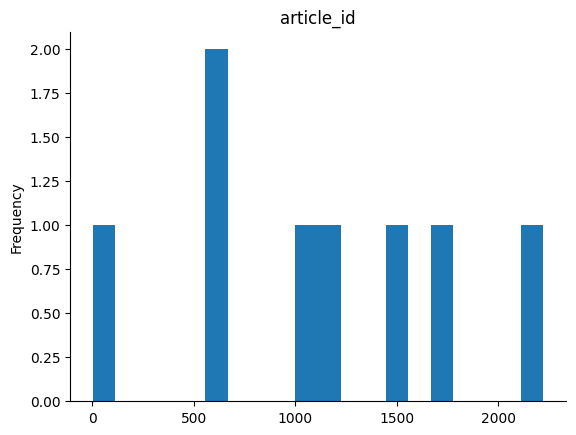

In [ ]:
# plotting a histogram for articleID column
from matplotlib import pyplot as plt
_df_0['article_id'].plot(kind='hist', bins=20, title='article_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  1490 non-null   int64 
 1   text        1490 non-null   object
 2   category    1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [ ]:
df.shape  # dimensions of dataframe

(1490, 3)

In [ ]:
df.isnull().sum()  # NO null values

article_id    0
text          0
category      0
dtype: int64

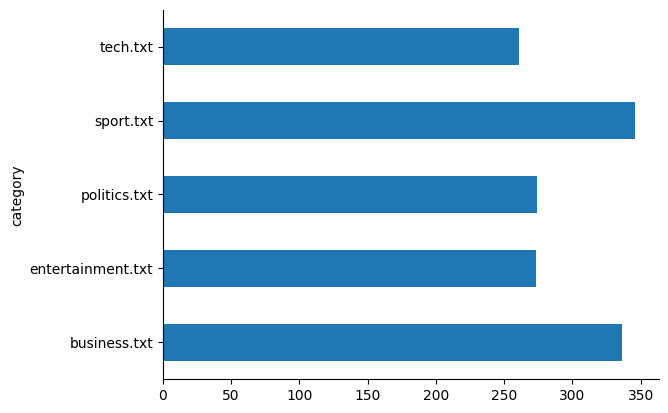

In [ ]:
# Data Visualization - Plotting a horizontal bar graph to display the count grouped by categoryID

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

Task2 - Data Preprocessing

Tokenization using NLTK

In [ ]:
'''
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')


df['tokenized_text'] = df['text'].apply(word_tokenize)   # Tokenizing the text data

nltk.download('stopwords')

def preprocess_text(tokenized_text):           # defining a function for preprocessing the tokenised text
    sw = set(stopwords.words('english'))    # Removing common stopwords like is, and , the.

    punc = set(string.punctuation)          # Removing Punctuaation marks

    ct = [token.lower() for token in tokenized_text                           # lowercasing alll tokens
                      if token.lower() not in sw and token not in punc]

    return ct

# using the preprocess_text function
df['preprocessed_text'] = df['tokenized_text'].apply(preprocess_text)
'''

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install contractions  # contractions module required to expand contracted words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.4 MB/s eta 0:00:00


In [ ]:
import unicodedata
import re
import contractions
import nltk
from nltk.corpus import stopwords
import string

# Download the necessary resources
nltk.download('punkt')
nltk.download('stopwords')

def remove_accents(text):

    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')  # Removing accents from a string using the unicodedata module.

def remove_html_tags(text):

    return re.sub(r'<[^>]+>', '', text) # Removing HTML tags from a string using regular expressions.

def expand_contractions(text):

    return contractions.fix(text) # Expanding contractions in a string using the contractions library, like isn't, wasn't, can't etc

def remove_urls(text):

    return re.sub(r'http\S+', '', text) # Removing URLs from a string using regular expressions.

def preprocess_text(text):

    tokenized_text = word_tokenize(text)  # Tokenize the text

    tokenized_text = [remove_accents(token) for token in tokenized_text]  # Remove accents

    tokenized_text = [remove_html_tags(token) for token in tokenized_text]  # Remove HTML tags

    tokenized_text = [expand_contractions(token) for token in tokenized_text]   # Expand contractions

    tokenized_text = [remove_urls(token) for token in tokenized_text]   # Remove URLs

    stop_words = set(stopwords.words('english'))
    punctuations = set(string.punctuation)

    cleaned_tokens = [token.lower() for token in tokenized_text
                      if token.lower() not in stop_words and token not in punctuations]

    return cleaned_tokens

df['preprocessed_text'] = df['text'].apply(preprocess_text)  # Tokenize and preprocess the text data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorizing the text using TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fitting and transforming the preprocessed text data
X = vectorizer.fit_transform(df['preprocessed_text'].apply(lambda x: ' '.join(x)))
y = df['category']


import numpy as np
vectorized_data = np.hstack((X.todense(), y.values.reshape(-1, 1)))
column_names = ['feature_{}'.format(i) for i in range(X.shape[1])] + ['category']
vectorized_df = pd.DataFrame(vectorized_data, columns=column_names)
vectorized_df.to_csv('vectorized_dataset.csv', index=False)   # Saving the vectorized df as a .csv file

Thank you

By
- M S Sathvick
